## <font color=red>**Goal:** To build a predictor model based on these variables (TV, radio and newspaper) and thus infer which of these variables is best

# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings\

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [4]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv('advertising.csv')

In [5]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


- Each row here represents different market
- TV, Radio and Newspaper column represents the amount spent by company in advertising on the respective media
- Sales column represents the sales

Let's inspect the various aspects of our dataframe

In [6]:
advertising.shape

(200, 4)

In [8]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [14]:
# import matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

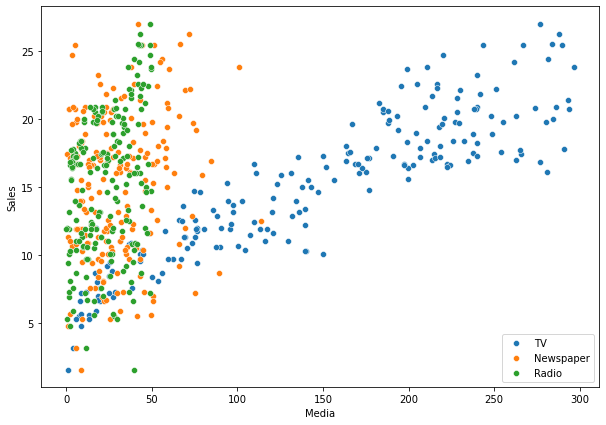

In [50]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = advertising, x='TV', y='Sales')
sns.scatterplot(x=advertising.Newspaper, y=advertising.Sales)
sns.scatterplot(x=advertising.Radio, y=advertising.Sales)

plt.xlabel('Media')

plt.legend(labels = ['TV', 'Newspaper', 'Radio'])
plt.show()

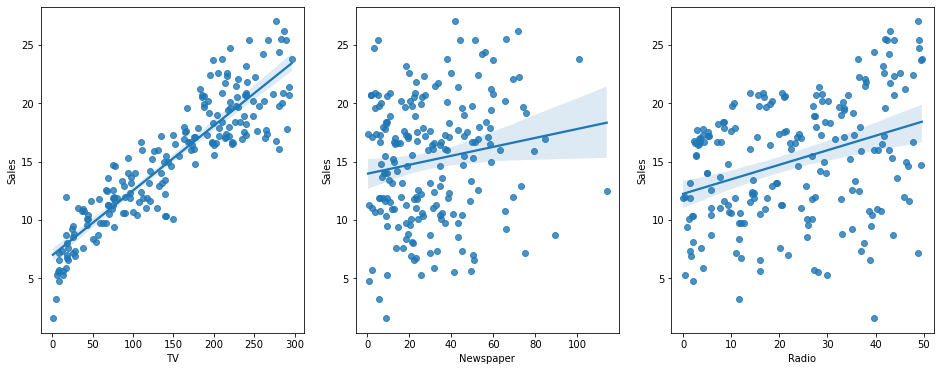

In [58]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.regplot(x=advertising.TV, y=advertising.Sales)

plt.subplot(1,3,2)
sns.regplot(x=advertising.Newspaper, y=advertising.Sales)

plt.subplot(1,3,3)
sns.reg


plot(x=advertising.Radio, y=advertising.Sales)

plt.show()

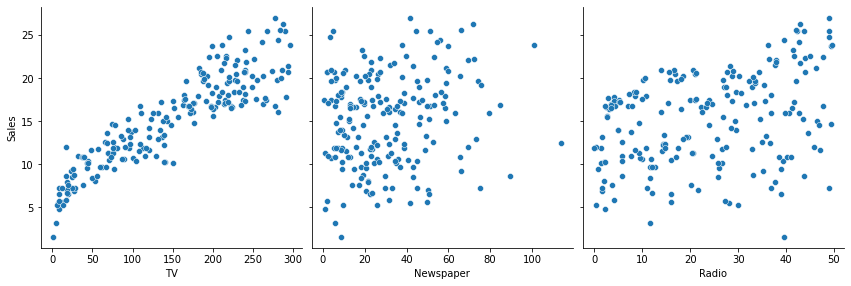

In [42]:
sns.pairplot(data= advertising, x_vars= ['TV','Newspaper','Radio'], y_vars='Sales', size=4)
plt.show()

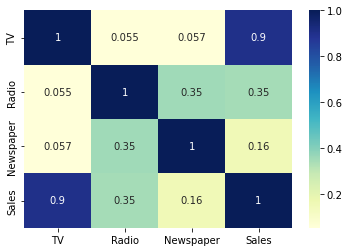

In [56]:
sns.heatmap(data=advertising.corr(), annot=True, cmap='YlGnBu')
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

In [61]:
# import libraries

import statsmodels
import statsmodels.api as sm

import sklearn

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [62]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [65]:
# import function

from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 100)

In [67]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [68]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodels.api` library using which you'll perform the linear regression.

In [70]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [71]:
X_train_sm = sm.add_constant(X_train)

In [72]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [73]:
# train the model

# Create the linear regression object
lr = sm.OLS(y_train, X_train_sm)

# create the model
lr_model = lr.fit()

In [76]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [77]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.52e-52
Time:                        07:18:41   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

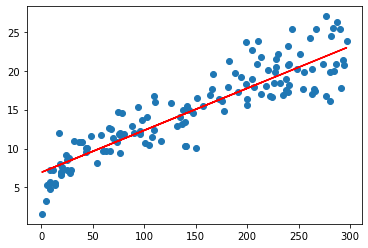

In [79]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, color = 'r')
plt.show()

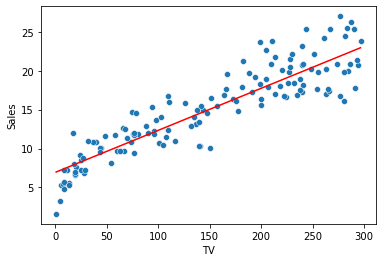

In [82]:
sns.scatterplot(X_train, y_train)
sns.lineplot(X_train, 6.948 + 0.054*X_train, color='r')
plt.show()

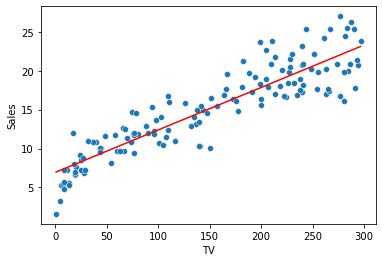

In [85]:
sns.scatterplot(X_train, y_train)
sns.lineplot(X_train, y_train_pred, color='r')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [84]:
# predicted model 

y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [87]:
# residuals/errors

res = y_train - y_train_pred

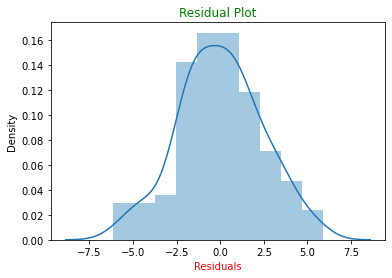

In [94]:
# plot the histogram for residuals to check for type of distribution

sns.distplot(res)
plt.xlabel('Residuals', color='r')
plt.title('Residual Plot', color='g')
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

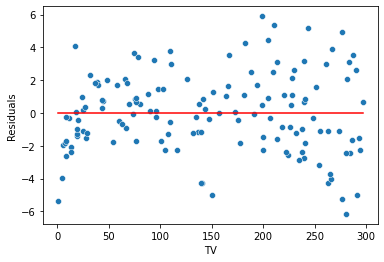

In [106]:
# plotting residuals vs X to look for patterns
sns.scatterplot(X_train, res)
plt.ylabel('Residuals')

# here this line denotes the best fit line
sns.lineplot(X_train, y=0, color='r')

plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [113]:
# add a consntant to the X_test
X_test_sm = sm.add_constant(X_test)

In [115]:
# predict the y values correspoding to the X_test_sm
y_test_pred = lr_model.predict(X_test_sm)

##### Looking at the RMSE

In [116]:
# import libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [122]:
# Returns the mean squared error; we'll take a square root

np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred))

2.0192960089662333

###### Checking the R-squared on the test set

In [118]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7921031601245657

In [123]:
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8157933136480389

##### Visualizing the fit on the test set

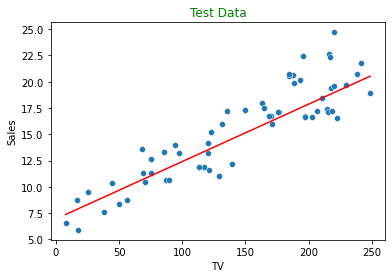

In [128]:
sns.scatterplot(X_test, y_test)
sns.lineplot(X_test, y_test_pred, color='r')
plt.title('Test Data', color='g')
plt.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [129]:
# import libraries

from sklearn.linear_model import LinearRegression

In [131]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size=0.7, random_state = 100)

In [132]:
X_train_lm.shape

(140,)

In [138]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [140]:
print(X_train_lm.shape)
print(X_test_lm.shape)
print(y_train_lm.shape)
print(y_test_lm.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [141]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train_lm, y_train_lm)

LinearRegression()

In [142]:
print(lr.coef_, lr.intercept_)

[0.05454575] 6.94868320000136


The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

In [146]:
# make predictions

y_train_pred = lr.predict(X_train_lm)
y_test_pred = lr.predict(X_test_lm)

In [147]:
# see r2 value

print(r2_score(y_true=y_train_lm, y_pred=y_train_pred))
print(r2_score(y_true=y_test_lm, y_pred=y_test_pred))

0.8157933136480388
0.792103160124566
